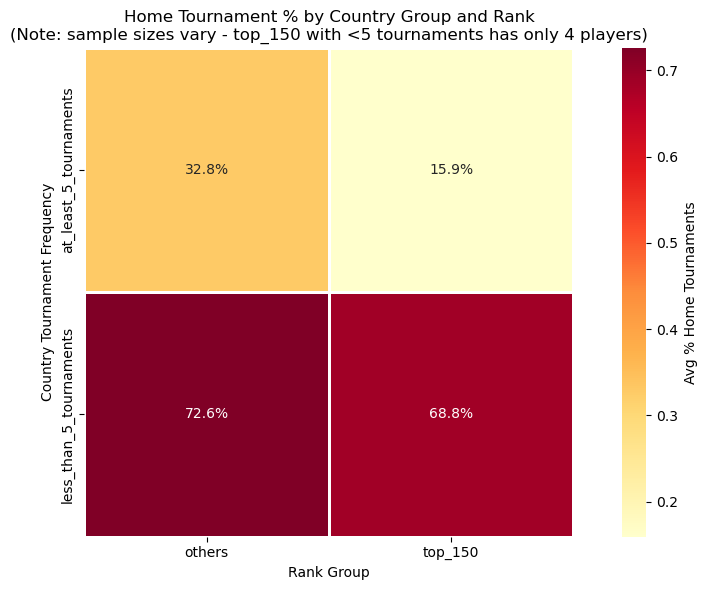

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('nationality_25.csv')

# Prepara matrice
matrix = df.pivot(index='country_group', 
                  columns='rank_group', 
                  values='avg_perc_home_played')

# Matrice per numero giocatori (per font size)
count_matrix = df.pivot(index='country_group', 
                        columns='rank_group', 
                        values='num_players')

plt.figure(figsize=(10, 6))
sns.heatmap(matrix, 
            annot=True, 
            fmt='.1%',
            cmap='YlOrRd',
            cbar_kws={'label': 'Avg % Home Tournaments'},
            linewidths=2,
            linecolor='white',
            square=True)

plt.title('Home Tournament % by Country Group and Rank\n' +
          '(Note: sample sizes vary - top_150 with <5 tournaments has only 4 players)',
          fontsize=12)
plt.ylabel('Country Tournament Frequency')
plt.xlabel('Rank Group')
plt.tight_layout()
plt.show()

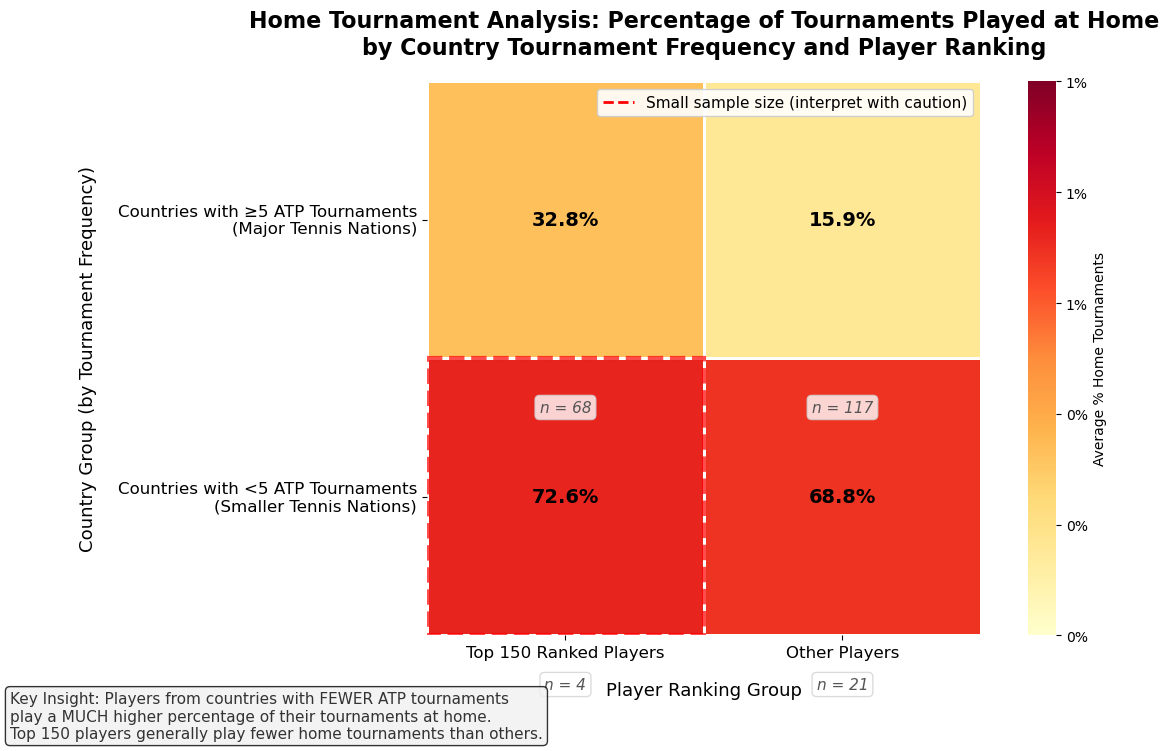


VERSIONE ALTERNATIVA: Heatmap con doppia annotazione


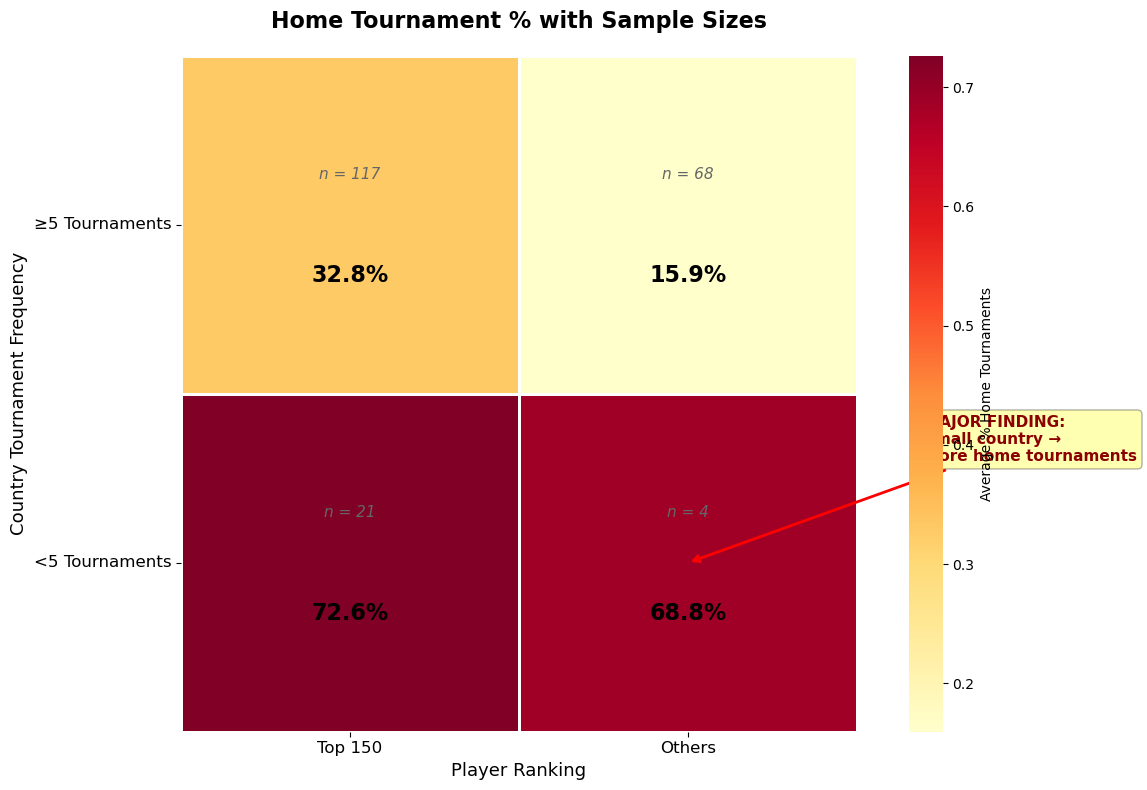

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. CREA HEATMAP MIGLIORATA
plt.figure(figsize=(12, 8))

# Crea la matrice per la heatmap
matrix = df.pivot(index='country_group', 
                  columns='rank_group', 
                  values='avg_perc_home_played')

# Crea heatmap con formattazione migliore
heatmap = sns.heatmap(
    matrix,
    annot=True,
    fmt='.1%',  # Formato percentuale con 1 decimale
    cmap='YlOrRd',  # Colori da giallo a rosso (più leggibile)
    cbar_kws={
        'label': 'Average % Home Tournaments',  # Etichetta colorbar
        'format': '%.0f%%'  # Formato percentuale nella colorbar
    },
    linewidths=2,
    linecolor='white',
    square=True,
    annot_kws={
        'size': 14,
        'weight': 'bold',
        'color': 'black'  # Colore testo per contrasto
    },
    vmin=0,  # Valore minimo per la scala colore
    vmax=1   # Valore massimo (100%)
)

# 3. MIGLIORA ETICHETTE E TITOLO
plt.title(
    'Home Tournament Analysis: Percentage of Tournaments Played at Home\n'
    'by Country Tournament Frequency and Player Ranking',
    fontsize=16,
    fontweight='bold',
    pad=20
)

# Etichette asse Y (country_group) più leggibili
yticks_labels = [
    'Countries with ≥5 ATP Tournaments\n(Major Tennis Nations)',
    'Countries with <5 ATP Tournaments\n(Smaller Tennis Nations)'
]
heatmap.set_yticklabels(yticks_labels, 
                       rotation=0,  # Orizzontale
                       fontsize=12,
                       verticalalignment='center')

# Etichette asse X (rank_group) più leggibili
xticks_labels = ['Top 150 Ranked Players', 'Other Players']
heatmap.set_xticklabels(xticks_labels, 
                       fontsize=12)

plt.ylabel('Country Group (by Tournament Frequency)', fontsize=13, labelpad=15)
plt.xlabel('Player Ranking Group', fontsize=13, labelpad=15)

# 4. AGGIUNGI ANNOTAZIONI CON NUMERO DI GIOCATORI
# Posiziona i numeri di giocatori sotto ogni cella
for i, (idx, row) in enumerate(df.iterrows()):
    # Calcola posizione nella matrice
    row_idx = 0 if row['country_group'] == 'at_least_5_tournaments' else 1
    col_idx = 0 if row['rank_group'] == 'top_150' else 1
    
    # Testo con numero giocatori
    player_text = f"n = {row['num_players']}"
    
    # Posiziona il testo sotto la cella
    plt.text(col_idx + 0.5, 
             row_idx + 1.15,  # Sotto la cella
             player_text,
             ha='center',
             va='top',
             fontsize=11,
             fontstyle='italic',
             color='#555555',
             bbox=dict(boxstyle='round,pad=0.3', 
                      facecolor='white', 
                      alpha=0.8,
                      edgecolor='lightgray'))

# 5. EVIDENZIA IL CAMPIONE PICCOLO
# Rettangolo rosso attorno al campione piccolo (n=4)
from matplotlib.patches import Rectangle

# Aggiungi rettangolo rosso per evidenziare campione piccolo
ax = plt.gca()
rect = Rectangle((0, 1),  # Angolo in basso a sinistra (x, y)
                 1,  # Larghezza
                 1,  # Altezza
                 linewidth=3,
                 edgecolor='red',
                 facecolor='none',
                 linestyle='--',
                 alpha=0.7,
                 label='Small sample (n=4)')
ax.add_patch(rect)

# 6. AGGIUNGI LEGENDA E NOTE
# Legenda per il rettangolo rosso
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='red', linestyle='--', linewidth=2, 
           label='Small sample size (interpret with caution)')
]

plt.legend(handles=legend_elements, 
           loc='upper right',
           fontsize=11,
           frameon=True,
           framealpha=0.9)

# Aggiungi nota esplicativa
note_text = (
    "Key Insight: Players from countries with FEWER ATP tournaments\n"
    "play a MUCH higher percentage of their tournaments at home.\n"
    "Top 150 players generally play fewer home tournaments than others."
)

plt.figtext(0.02, 0.02,  # Posizione in basso a sinistra
            note_text,
            fontsize=11,
            color='#333333',
            bbox=dict(boxstyle='round', facecolor='#f0f0f0', alpha=0.8))

# 7. AGGIUSTA LAYOUT
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Spazio per la nota

plt.show()

# 8. VERSIONE ALTERNATIVA: HEATMAP CON VALORI ASSOLUTI E %
print("\n" + "="*60)
print("VERSIONE ALTERNATIVA: Heatmap con doppia annotazione")
print("="*60)

fig, ax = plt.subplots(figsize=(12, 8))

# Heatmap con doppia annotazione: % sopra, n sotto
heatmap2 = sns.heatmap(
    matrix,
    annot=False,  # Non usare annot standard
    cmap='YlOrRd',
    cbar_kws={'label': 'Average % Home Tournaments'},
    linewidths=2,
    linecolor='white',
    square=True,
    ax=ax
)

# Aggiungi annotazioni personalizzate
for i in range(matrix.shape[0]):  # Righe
    for j in range(matrix.shape[1]):  # Colonne
        value = matrix.iloc[i, j]
        n_players = df[(df['country_group'] == matrix.index[i]) & 
                       (df['rank_group'] == matrix.columns[j])]['num_players'].values[0]
        
        # Percentuale grande e in grassetto
        ax.text(j + 0.5, i + 0.65,  # Centro cella (leggermente sopra)
                f'{value:.1%}',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                color='black')
        
        # Numero giocatori più piccolo sotto
        ax.text(j + 0.5, i + 0.35,  # Centro cella (leggermente sotto)
                f'n = {n_players}',
                ha='center',
                va='center',
                fontsize=11,
                fontstyle='italic',
                color='#666666')

# Etichette migliorate
yticks_labels = ['≥5 Tournaments', '<5 Tournaments']
xticks_labels = ['Top 150', 'Others']

heatmap2.set_yticklabels(yticks_labels, rotation=0, fontsize=12)
heatmap2.set_xticklabels(xticks_labels, fontsize=12)

plt.title('Home Tournament % with Sample Sizes', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Country Tournament Frequency', fontsize=13)
plt.xlabel('Player Ranking', fontsize=13)

# Evidenzia differenze chiave con frecce
ax.annotate('MAJOR FINDING:\nSmall country →\nMore home tournaments',
            xy=(1.5, 1.5),
            xytext=(2.2, 1.2),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11,
            fontweight='bold',
            color='darkred',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()